# 비정형 데이터마이닝

In [5]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

1.&nbsp; '연설문.txt' 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [3]:
data_path = '/hdd/data/adp_data/연설문.txt'

def preprocess_speech(file_path):
    with open(file_path, 'r', encoding = 'cp949') as file:
        text = file.read()

    cleaned_data = re.sub(r'[^\w\s]',  '', text)
    cleaned_data = re.sub(r'\d+', '', cleaned_data)

    return cleaned_data

cleaned_speech = preprocess_speech(data_path)
print(cleaned_speech[:500])

존경하고 사랑하는 국민 여러분 감사합니다
국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다 저는 오늘 대한민국 제대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다

우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다

함께 선거를 치른 후보들께 감사의 말씀과 심심한 위로를 전합니다 이번 선거에서는 승자도 패자도 없습니다 우리는 새로운 대한민국을 함께


2.&nbsp; 전처리된 데이터에서 명사를 추출하고 명사의 출현빈도를 10위까지 추출하여 막대그래프로 시각화하시오.

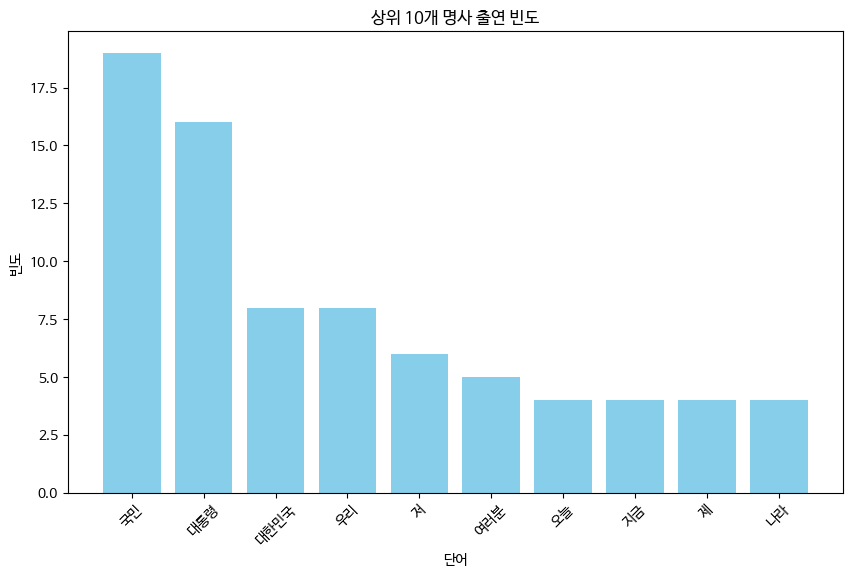

In [4]:
okt = Okt()
nouns = okt.nouns(cleaned_speech)

counter = Counter(nouns)
most_common = counter.most_common(n = 10)
words, counts = zip(*most_common)

plt.figure(figsize = (10, 6))
plt.bar(words, counts, color = 'skyblue')
plt.xlabel('단어')
plt.ylabel('빈도')
plt.title('상위 10개 명사 출연 빈도')
plt.xticks(rotation = 45)
plt.show()

3.&nbsp; 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

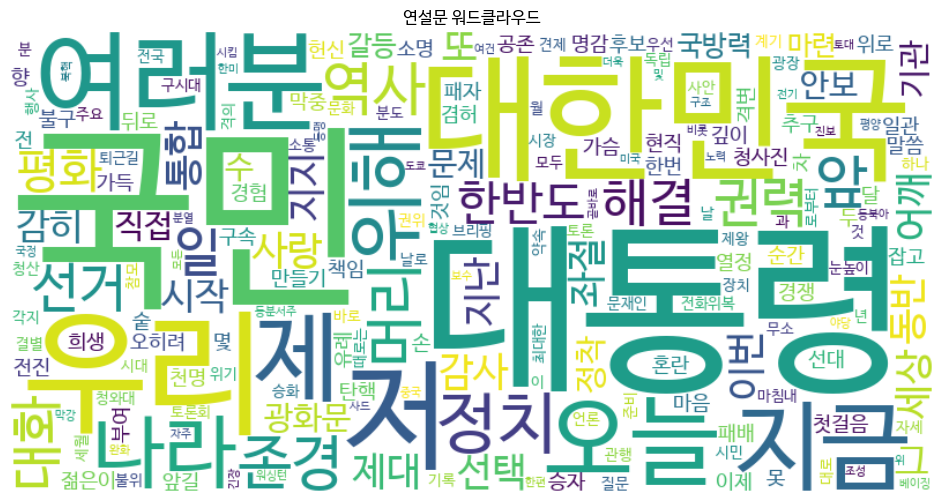

In [6]:
wordcloud = WordCloud(
    font_path = font_path, background_color = 'white', width = 800, height = 400
).generate_from_frequencies(counter)

plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('연설문 워드클라우드')
plt.show()